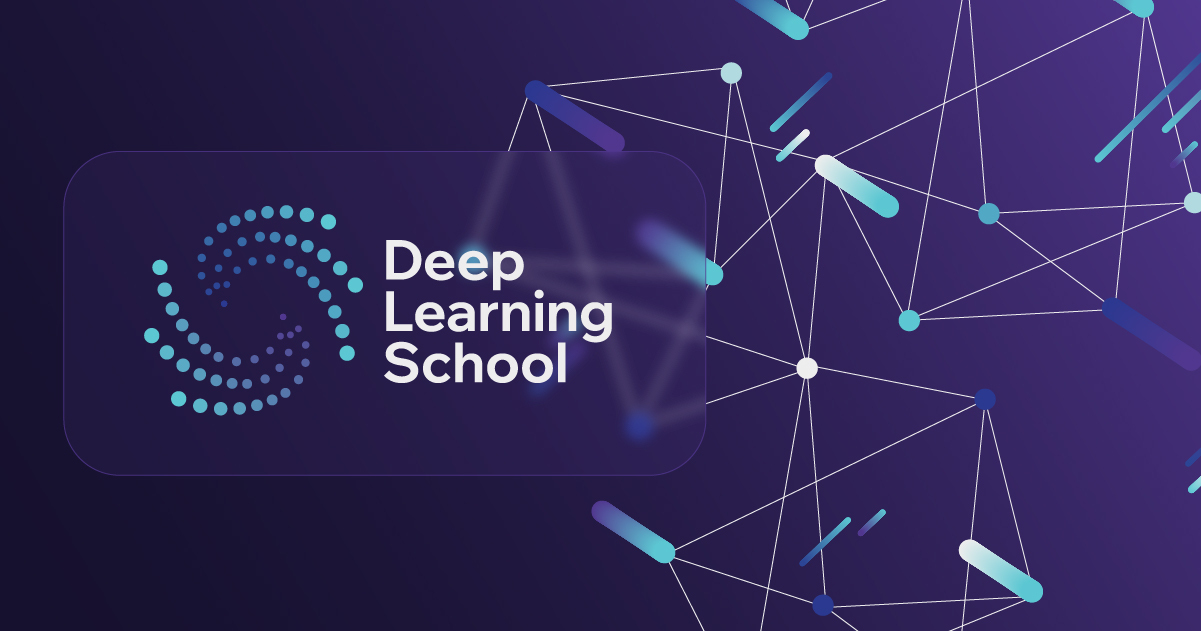

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

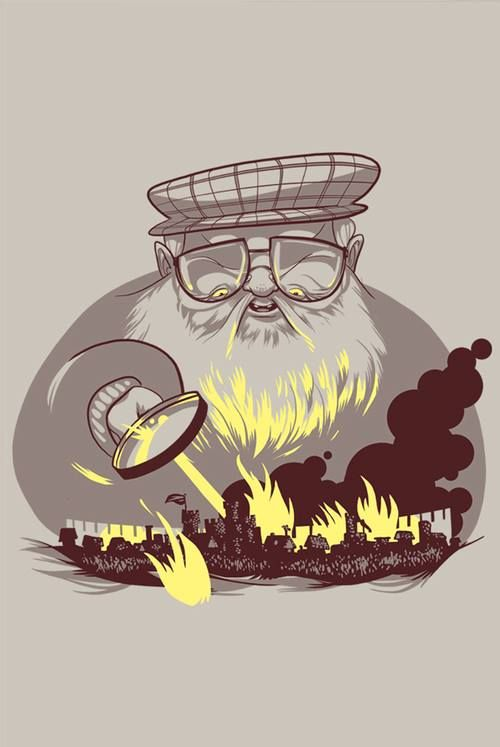

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [168]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 53.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 98.4MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [170]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col=0)
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [171]:
test_data = pd.read_csv('/content/game_of_thrones_test.csv', index_col=0)
test_data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [172]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [173]:
data = data.query('not (title.isna() & culture.isna() & house.isna() & popularity < 0.5)')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [174]:
data['house'].unique()

array([nan, 'House Frey', 'House Swyft', 'House Arryn', 'House Santagar',
       'House Targaryen', 'House Osgrey', "Night's Watch", 'House Humble',
       'House Wylde', 'House Wode', 'House Fell',
       'Brotherhood Without Banners', 'House Webber', 'House Greyjoy',
       'House Stark', 'House Waynwood', 'House Dayne', 'House Manderly',
       'House Farwynd of the Lonely Light', 'Happy Port',
       'House of Loraq', 'Kingswood Brotherhood', 'House Botley',
       'Burned Men', 'House Velaryon', 'House Tallhart', 'House Tyrell',
       'House Blackwood', 'House Blackfyre', 'wildling',
       'Kingdom of the Three Daughters',
       'House Royce of the Gates of the Moon', 'House Nayland',
       "House Vance of Wayfarer's Rest", 'House Rowan', 'House Farrow',
       'House Lonmouth', 'House Reyne', 'House Ashford', 'House Brax',
       'House Paege', 'House Hollard', 'House Tarth', 'House Ryswell',
       'House Lannister', 'House Crakehall', 'House Darklyn',
       'House Westerli

In [175]:
data.house = data.house.fillna('Unknown')
test_data.house = test_data.house.fillna('Unknown')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,Unknown,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


<ipython-input-176-e90ec47f8a91>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age, kde=True)


<Axes: xlabel='age', ylabel='Density'>

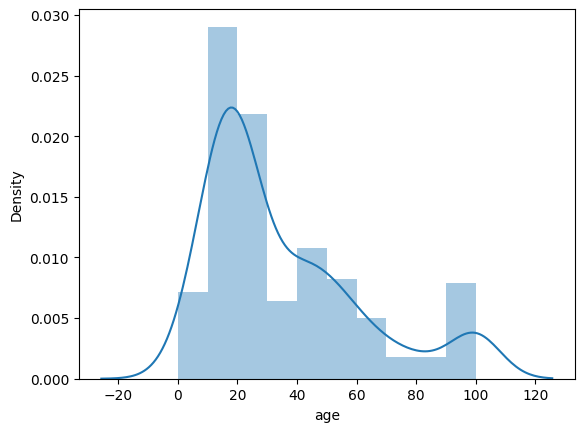

In [176]:
sns.distplot(data.age, kde=True)

In [177]:
data.age = data.age.fillna(data.age.median())
test_data.age = test_data.age.fillna(test_data.age.median())

In [178]:
data.culture = data.culture.fillna('Unknown')
test_data.culture = test_data.culture.fillna('Unknown')

In [179]:
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,Unknown,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,Unknown,NaN,...,1.0,0.0,0.0,NaN,0,0,24.0,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,Unknown,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,24.0,0,0.267559,1
4,Aemma Arryn,Queen,0,Unknown,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Unknown,NaN,NaN,NaN,NaN,Unknown,NaN,...,NaN,NaN,NaN,NaN,0,1,24.0,0,0.160535,1
1554,Masha Heddle,NaN,0,Unknown,NaN,NaN,NaN,NaN,Unknown,NaN,...,NaN,NaN,NaN,NaN,0,0,24.0,0,0.040134,0
1555,Matthos Seaworth,NaN,1,Unknown,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,24.0,0,0.076923,0


<ipython-input-180-1d35d6cb55c9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.dateOfBirth, kde=True)


<Axes: xlabel='dateOfBirth', ylabel='Density'>

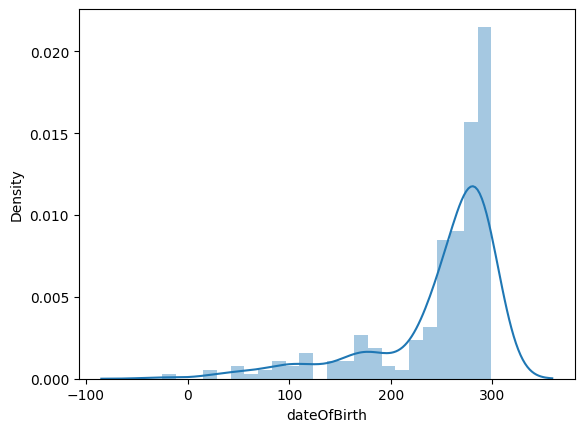

In [180]:
sns.distplot(data.dateOfBirth, kde=True)

заменю дату рождения на медиану. В целом она не так важна, но имеет значение, если дата была больше 100 лет назад условно. Значит дропать тоже нельзя

In [181]:
data.dateOfBirth = data.dateOfBirth.fillna(data.dateOfBirth.median())
test_data.dateOfBirth = test_data.dateOfBirth.fillna(test_data.dateOfBirth.median())

In [182]:
data.isnull().sum()

,0
name,0
title,840
male,0
culture,0
dateOfBirth,0
mother,1539
father,1535
heir,1536
house,0
spouse,1357


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [183]:
data['isPopular'] = data.popularity.apply(lambda x: 1 if x > 0.5 else 0)
test_data['isPopular'] = test_data.popularity.apply(lambda x: 1 if x > 0.5 else 0)
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,Unknown,272.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,Unknown,NaN,...,0.0,0.0,NaN,0,0,24.0,11,0.605351,0,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,1
3,Addison Hill,Ser,1,Unknown,272.0,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,0,1,24.0,0,0.267559,1,0
4,Aemma Arryn,Queen,0,Unknown,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0


In [184]:
import pandas as pd

# Ваш словарь культур
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

# Функция для нормализации одного значения культуры (та же, что и раньше)
def normalize_culture_value(culture_val, culture_mapping_dict):
    if pd.isna(culture_val):
        return 'unknown'
    culture_lower = str(culture_val).lower().strip()
    for canonical_name, variations in culture_mapping_dict.items():
        if culture_lower in [v.lower().strip() for v in variations]:
            return canonical_name
    return 'unknown'

# Определяем список всех категорий ОДИН РАЗ.
# Это важно для консистентности между train и test.
ALL_POSSIBLE_CULTURES = sorted(list(cult.keys()) + ['unknown'])

def preprocess_culture_features(df_input, culture_column_name='culture',
                                culture_map_dict=None, all_categories=None,
                                drop_original_and_intermediate=True):

    if culture_map_dict is None or all_categories is None:
        raise ValueError("`culture_map_dict` и `all_categories` должны быть предоставлены.")

    df = df_input.copy() # Работаем с копией, чтобы не изменять оригинальный DataFrame

    # 1. Нормализация
    normalized_col = f"normalized_{culture_column_name}"
    df[normalized_col] = df[culture_column_name].apply(
        lambda x: normalize_culture_value(x, culture_map_dict)
    )

    # 2. Преобразование в категориальный тип
    # Это гарантирует, что get_dummies создаст столбцы для ВСЕХ all_categories
    categorical_col = f"{normalized_col}_cat"
    df[categorical_col] = pd.Categorical(
        df[normalized_col],
        categories=all_categories
    )

    # 3. One-Hot Encoding
    # Применяем get_dummies к столбцу ИЗ ТЕКУЩЕГО df (train или test)
    # dtype=int создаст 0 и 1 вместо True/False
    dummies = pd.get_dummies(df[categorical_col], prefix=culture_column_name, dtype=int)

    # 4. Конкатенация
    df = pd.concat([df, dummies], axis=1)

    # 5. Удаление промежуточных и исходного столбцов (если указано)
    if drop_original_and_intermediate:
        columns_to_drop = [culture_column_name, normalized_col, categorical_col]
        # Удаляем только те столбцы, которые реально существуют в df, на случай повторного вызова
        df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

    return df

# --- Пример использования ---

# 1. Создаем примеры тренировочного и тестового датасетов



# Обработка тренировочного датасета
data = preprocess_culture_features(
    data,
    culture_column_name='culture',
    culture_map_dict=cult,
    all_categories=ALL_POSSIBLE_CULTURES
)
print("\n--- Обработанный тренировочный DataFrame ---")
print(data.to_string()) # .to_string() для вывода всех столбцов



# Обработка тестового датасета с теми же параметрами
test_data = preprocess_culture_features(
    test_data,
    culture_column_name='culture',
    culture_map_dict=cult,
    all_categories=ALL_POSSIBLE_CULTURES
)
print("\n--- Обработанный тестовый DataFrame ---")
print(test_data.to_string())




--- Обработанный тренировочный DataFrame ---
                                            name                                                        title  male  dateOfBirth                  mother                  father                           heir                                    house                                spouse  book1  book2  book3  book4  book5  isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble    age  numDeadRelations  popularity  isAlive  isPopular  culture_Andal  culture_Asshai  culture_Braavosi  culture_Dornish  culture_Free Folk  culture_Ghiscari  culture_Lysene  culture_Myrish  culture_Northmen  culture_Norvoshi  culture_Qartheen  culture_Reach  culture_Stormlander  culture_Summer Islands  culture_Westermen  culture_Westerosi  culture_unknown
S.No                                                                                                                                                                                             

In [185]:
data.head()

,name,title,male,dateOfBirth,mother,father,heir,house,spouse,book1,...,culture_Myrish,culture_Northmen,culture_Norvoshi,culture_Qartheen,culture_Reach,culture_Stormlander,culture_Summer Islands,culture_Westermen,culture_Westerosi,culture_unknown
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,272.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,Unknown,NaN,0,...,0,0,0,0,0,0,0,0,0,1
2,Walder Frey,Lord of the Crossing,1,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,...,0,0,0,0,0,0,0,0,0,1
3,Addison Hill,Ser,1,272.0,NaN,NaN,NaN,House Swyft,NaN,0,...,0,0,0,0,0,0,0,0,0,1
4,Aemma Arryn,Queen,0,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,...,0,0,0,0,0,0,0,0,0,1
5,Sylva Santagar,Greenstone,0,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
data['boolDeadRelations'] = data.numDeadRelations.apply(lambda x: 1 if x > 0 else 0)
test_data['boolDeadRelations'] = test_data.numDeadRelations.apply(lambda x: 1 if x > 0 else 0)

In [187]:
data.head()

,name,title,male,dateOfBirth,mother,father,heir,house,spouse,book1,...,culture_Northmen,culture_Norvoshi,culture_Qartheen,culture_Reach,culture_Stormlander,culture_Summer Islands,culture_Westermen,culture_Westerosi,culture_unknown,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,272.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,Unknown,NaN,0,...,0,0,0,0,0,0,0,0,1,1
2,Walder Frey,Lord of the Crossing,1,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,...,0,0,0,0,0,0,0,0,1,1
3,Addison Hill,Ser,1,272.0,NaN,NaN,NaN,House Swyft,NaN,0,...,0,0,0,0,0,0,0,0,1,0
4,Aemma Arryn,Queen,0,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,...,0,0,0,0,0,0,0,0,1,0
5,Sylva Santagar,Greenstone,0,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
data.columns.tolist()

['name',
 'title',
 'male',
 'dateOfBirth',
 'mother',
 'father',
 'heir',
 'house',
 'spouse',
 'book1',
 'book2',
 'book3',
 'book4',
 'book5',
 'isAliveMother',
 'isAliveFather',
 'isAliveHeir',
 'isAliveSpouse',
 'isMarried',
 'isNoble',
 'age',
 'numDeadRelations',
 'popularity',
 'isAlive',
 'isPopular',
 'culture_Andal',
 'culture_Asshai',
 'culture_Braavosi',
 'culture_Dornish',
 'culture_Free Folk',
 'culture_Ghiscari',
 'culture_Lysene',
 'culture_Myrish',
 'culture_Northmen',
 'culture_Norvoshi',
 'culture_Qartheen',
 'culture_Reach',
 'culture_Stormlander',
 'culture_Summer Islands',
 'culture_Westermen',
 'culture_Westerosi',
 'culture_unknown',
 'boolDeadRelations']

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [189]:
data.drop(columns=['title', 'mother', 'father', 'heir', 'spouse', 'isAliveMother',
                   'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'numDeadRelations',
                   'popularity'], inplace = True)
test_data.drop(columns=['title', 'mother', 'father', 'heir', 'spouse', 'isAliveMother',
                   'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'numDeadRelations',
                   'popularity'], inplace = True)

In [190]:
data.head()

,name,male,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,...,culture_Northmen,culture_Norvoshi,culture_Qartheen,culture_Reach,culture_Stormlander,culture_Summer Islands,culture_Westermen,culture_Westerosi,culture_unknown,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,1,272.0,Unknown,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,Walder Frey,1,208.0,House Frey,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
3,Addison Hill,1,272.0,House Swyft,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Aemma Arryn,0,82.0,House Arryn,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,Sylva Santagar,0,276.0,House Santagar,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

male


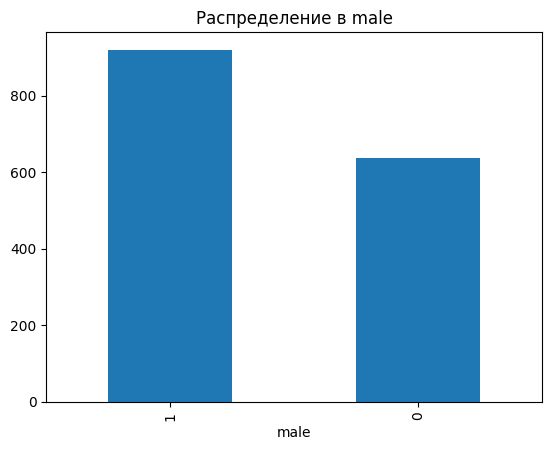

dateOfBirth


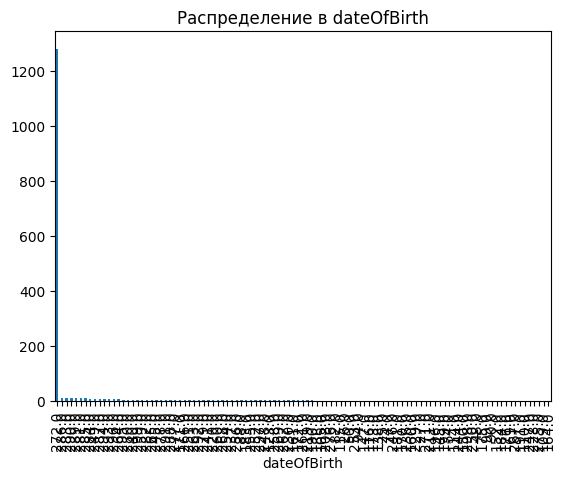

house


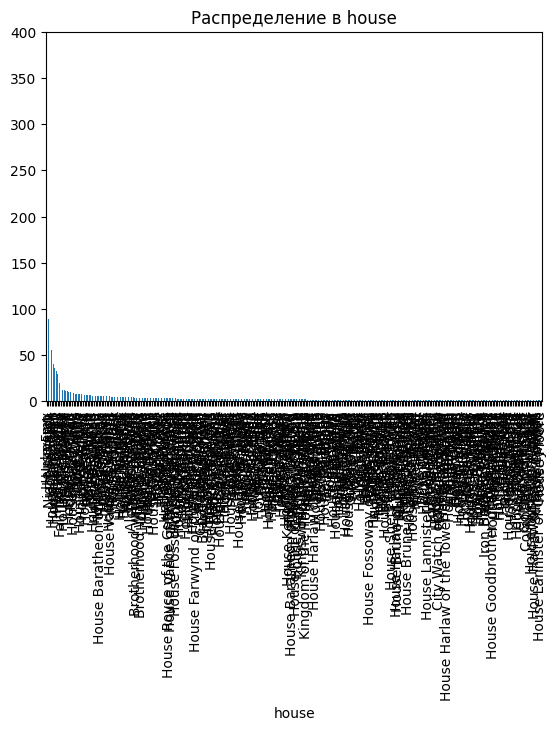

book1


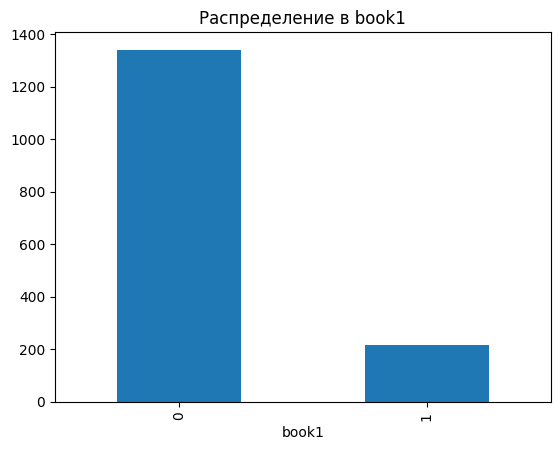

book2


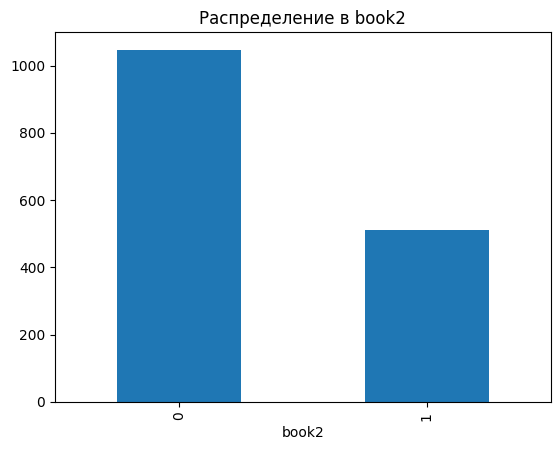

book3


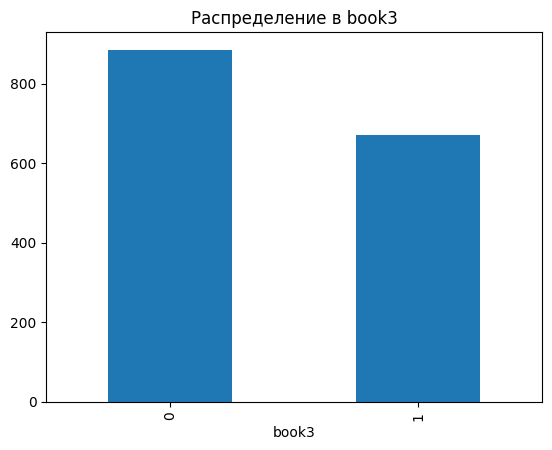

book4


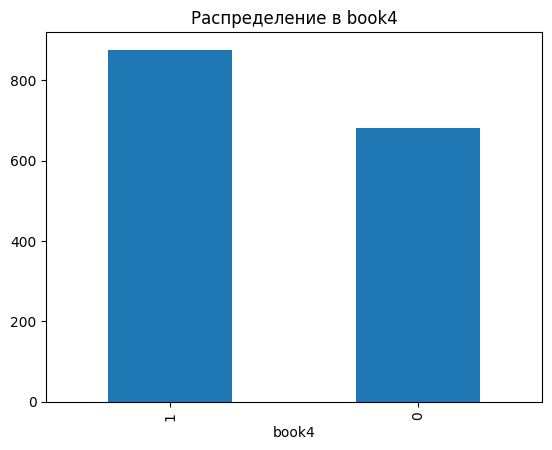

book5


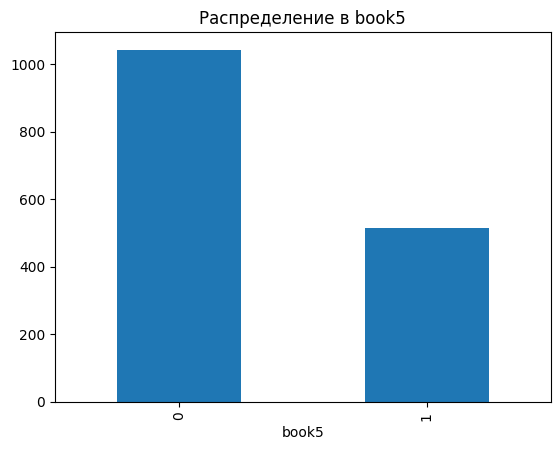

isMarried


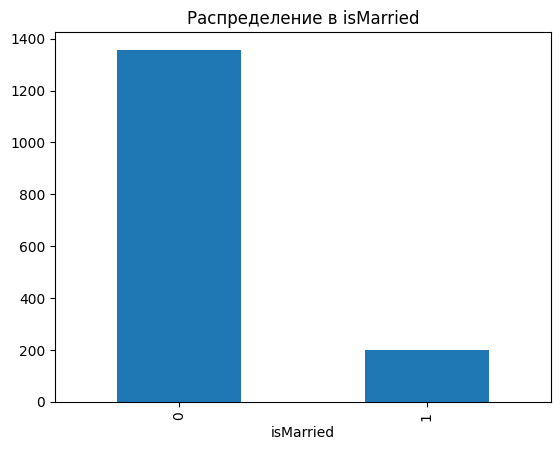

isNoble


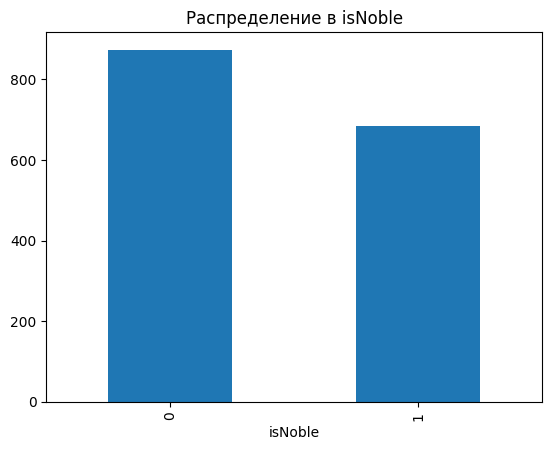

age


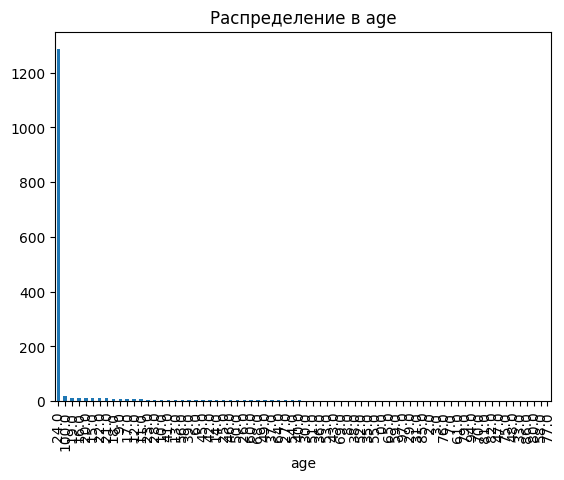

isAlive


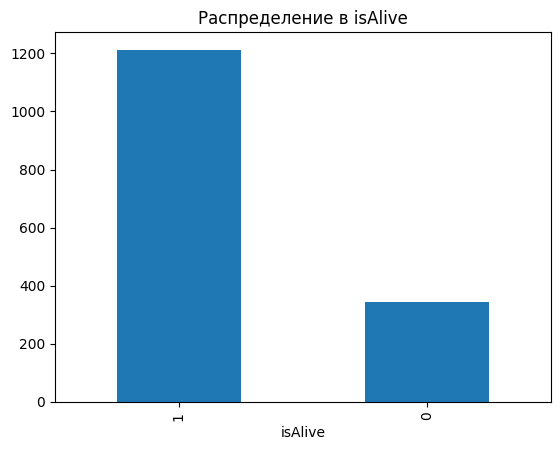

isPopular


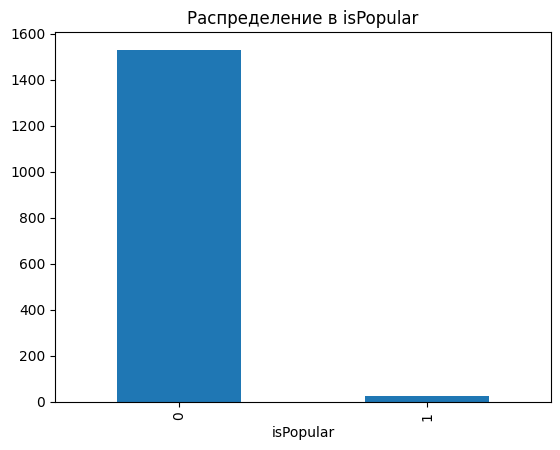

culture_Andal


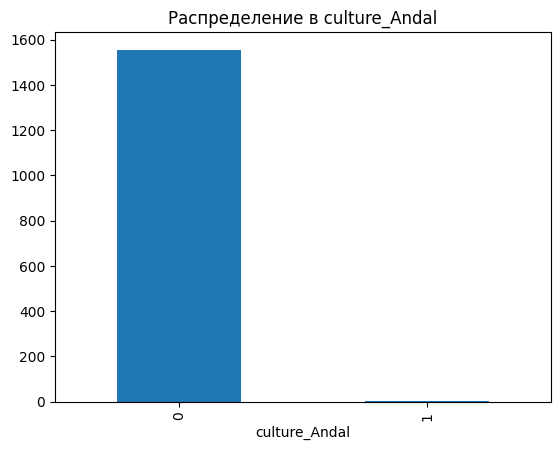

culture_Asshai


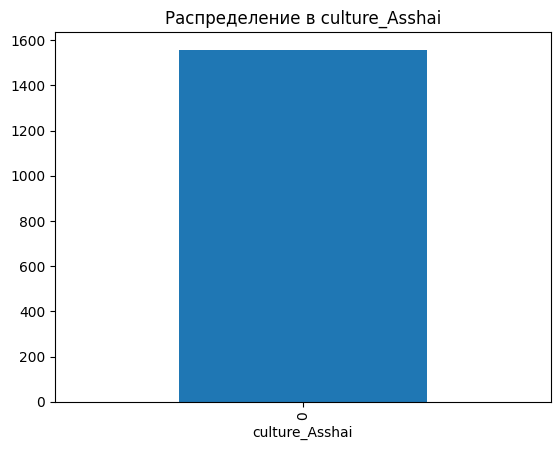

culture_Braavosi


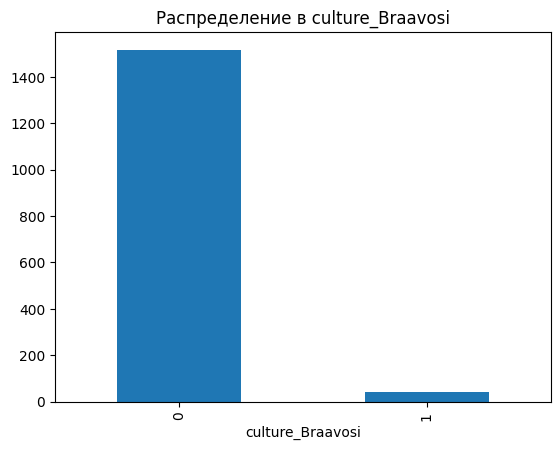

culture_Dornish


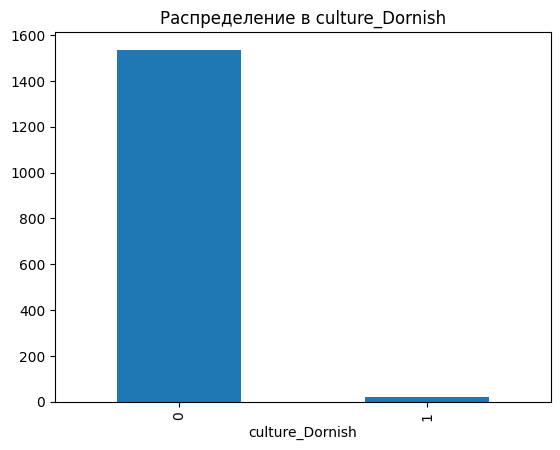

culture_Free Folk


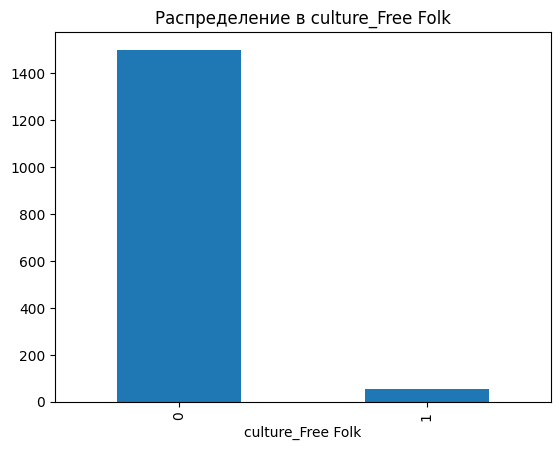

culture_Ghiscari


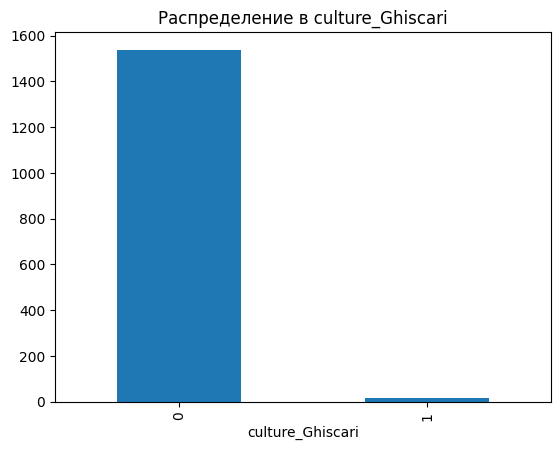

culture_Lysene


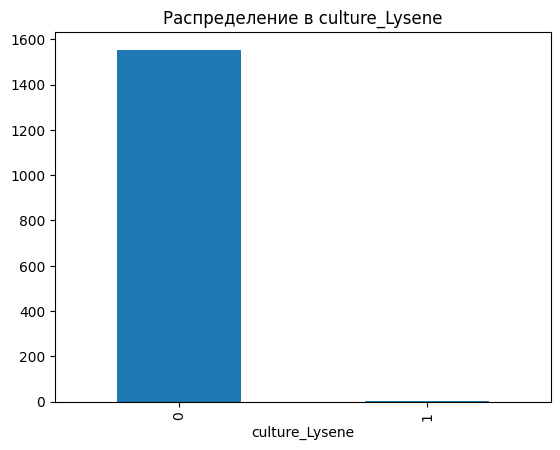

culture_Myrish


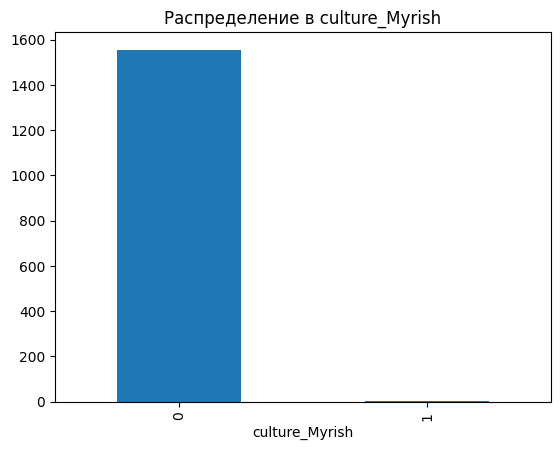

culture_Northmen


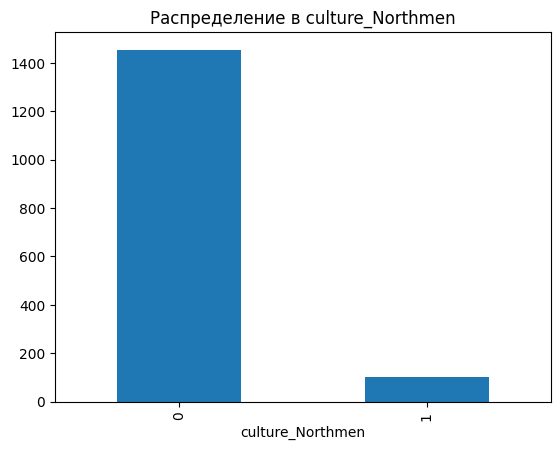

culture_Norvoshi


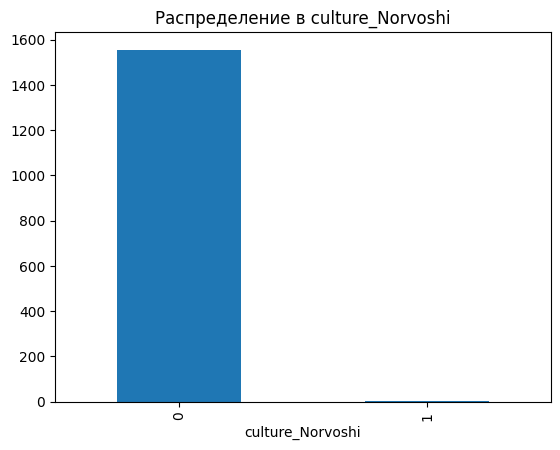

culture_Qartheen


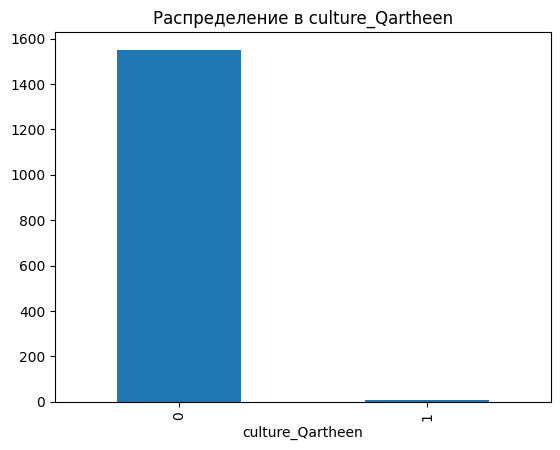

culture_Reach


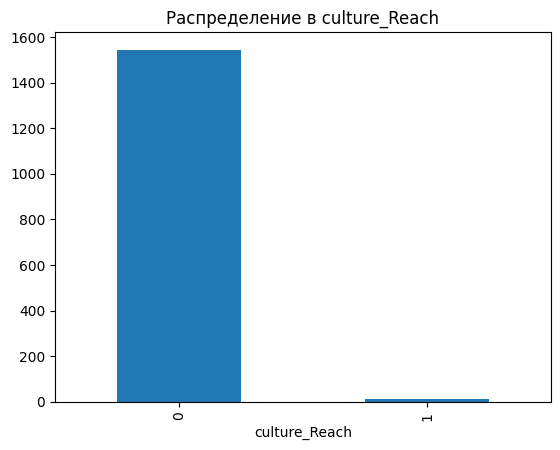

culture_Stormlander


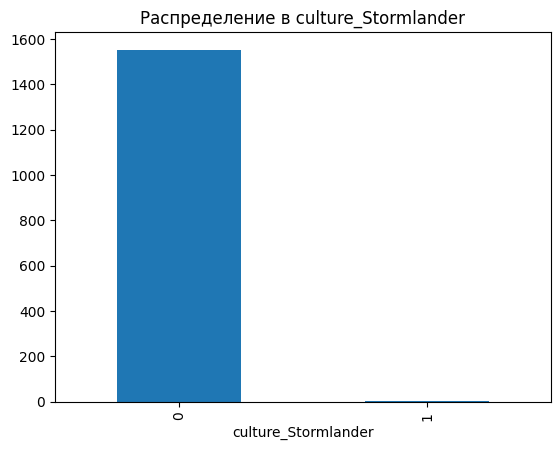

culture_Summer Islands


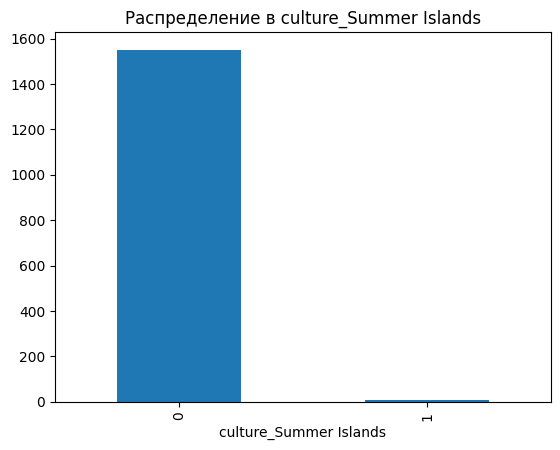

culture_Westermen


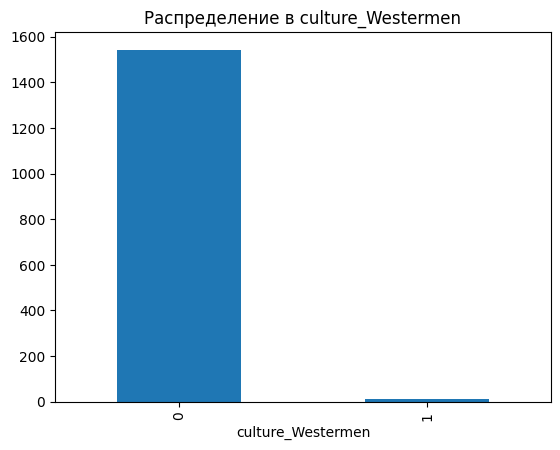

culture_Westerosi


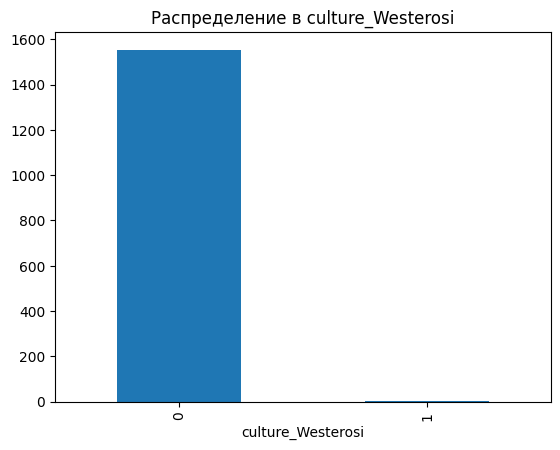

culture_unknown


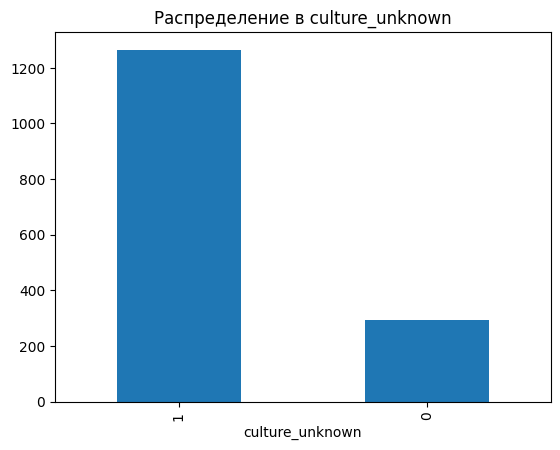

boolDeadRelations


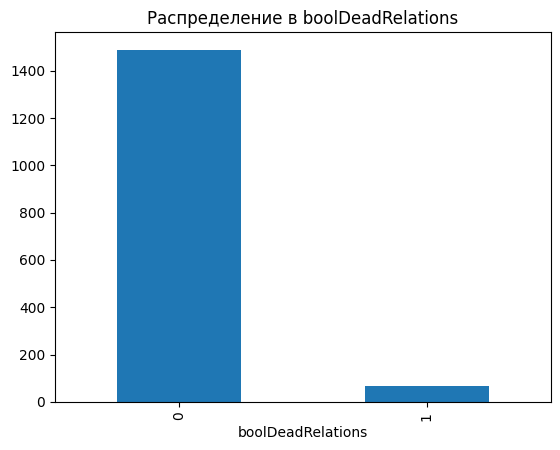

In [191]:
for col in data.columns[1:]:
  print(col)
  counts = data[col].value_counts()
  counts.plot(kind='bar', title=f'Распределение в {col}')
  plt.show()

In [192]:
data = data.drop(columns=['house'])
test_data = test_data.drop(columns=['house'])

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [193]:
test_data.to_string()

"                     name  male  dateOfBirth  book1  book2  book3  book4  book5  isMarried  isNoble       age  isPopular  culture_Andal  culture_Asshai  culture_Braavosi  culture_Dornish  culture_Free Folk  culture_Ghiscari  culture_Lysene  culture_Myrish  culture_Northmen  culture_Norvoshi  culture_Qartheen  culture_Reach  culture_Stormlander  culture_Summer Islands  culture_Westermen  culture_Westerosi  culture_unknown  boolDeadRelations\nS.No                                                                                                                                                                                                                                                                                                                                                                                                                                                       \n1558    Melissa Blackwood     0        156.0      0      0      0      0      1          0        0     100.0

In [194]:
data = data.drop(columns=['name'])
test_data = test_data.drop(columns=['name'])
data.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,culture_Northmen,culture_Norvoshi,culture_Qartheen,culture_Reach,culture_Stormlander,culture_Summer Islands,culture_Westermen,culture_Westerosi,culture_unknown,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,272.0,0,0,0,0,0,0,0,24.0,...,0,0,0,0,0,0,0,0,1,1
2,1,208.0,1,1,1,1,1,1,1,97.0,...,0,0,0,0,0,0,0,0,1,1
3,1,272.0,0,0,0,1,0,0,1,24.0,...,0,0,0,0,0,0,0,0,1,0
4,0,82.0,0,0,0,0,0,1,1,23.0,...,0,0,0,0,0,0,0,0,1,0
5,0,276.0,0,0,0,1,0,1,1,29.0,...,0,0,0,0,0,0,0,0,0,0


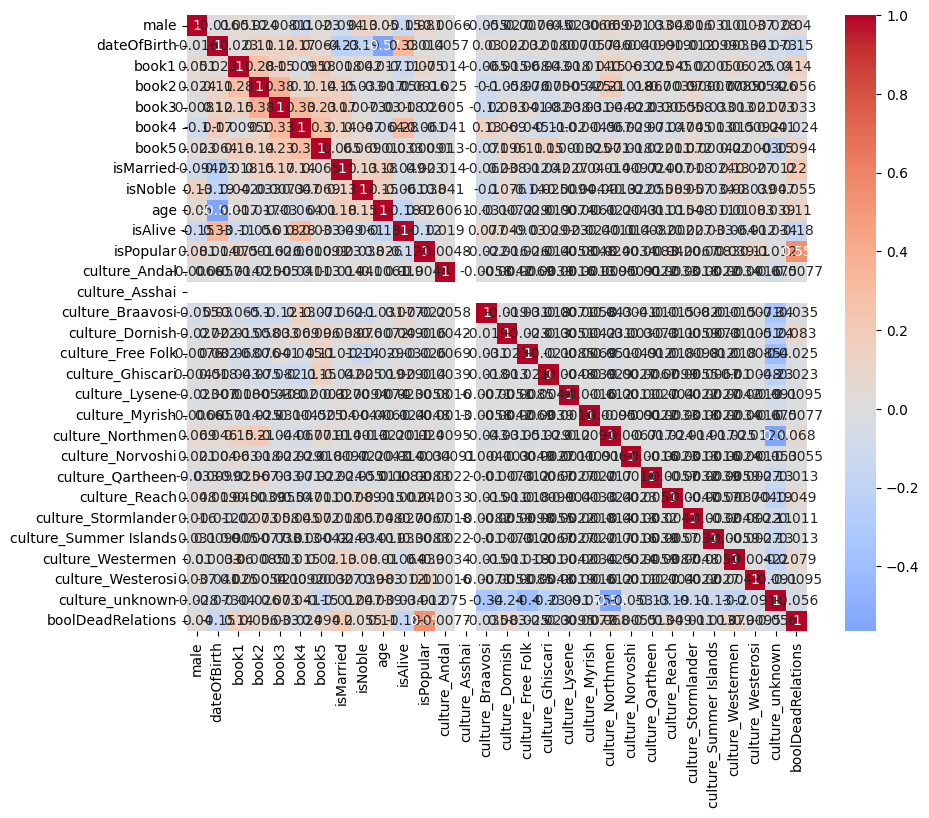

In [195]:

corr = data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, fmt='.2g', cmap='coolwarm', center=0)

plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [196]:
X = data.drop(columns=['isAlive'])
y = data.isAlive

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [199]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [200]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [201]:
X_train

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,culture_Northmen,culture_Norvoshi,culture_Qartheen,culture_Reach,culture_Stormlander,culture_Summer Islands,culture_Westermen,culture_Westerosi,culture_unknown,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1129,0,272.0,0,0,0,1,1,0,1,24.0,...,0,0,0,0,0,0,0,0,1,0
1235,1,272.0,0,0,0,0,1,0,1,24.0,...,0,0,0,0,0,0,0,0,0,0
737,0,272.0,0,0,1,1,0,0,0,24.0,...,0,0,0,0,0,0,0,0,1,0
1365,1,272.0,0,0,0,0,0,1,1,24.0,...,0,0,0,0,0,0,0,0,1,0
1253,1,272.0,0,0,1,1,1,0,0,24.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,272.0,0,0,0,1,1,0,1,24.0,...,0,0,0,0,0,0,0,0,1,0
1295,1,272.0,0,0,0,1,0,0,1,24.0,...,0,0,0,0,0,0,0,0,1,0
861,1,272.0,0,1,0,0,0,0,0,24.0,...,0,0,0,0,0,0,0,0,1,0


In [202]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [203]:
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=42)
random_forest = RandomForestClassifier()
gaussian_process = GaussianProcessClassifier()
gaussian_nb = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()
tree = DecisionTreeClassifier()

# Шаг 2. обучение модели
ada_boost.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gaussian_process.fit(X_train, y_train)
gaussian_nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
tree.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_gp = gaussian_process.predict(X_test)
y_pred_gnb = gaussian_nb.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [204]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [205]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7840


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [206]:
# Шаг 3. Предсказание на тестовых данных
accuracy_ada = accuracy_score(y_test, y_pred_ada)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gp = accuracy_score(y_test, y_pred_gp)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy on AdaBoostClassifier: %.4f" % accuracy_ada)
print("Accuracy on RandomForest: %.4f" % accuracy_rf)
print("Accuracy on GaussianProcess: %.4f" % accuracy_gp)
print("Accuracy on Gaussian_NB: %.4f" % accuracy_gnb)
print("Accuracy on KNN: %.4f" % accuracy_knn)
print("Accuracy on SVC: %.4f" % accuracy_svc)
print("Accuracy on DecisionTree: %.4f" % accuracy_tree)

Accuracy on AdaBoostClassifier: 0.7471
Accuracy on RandomForest: 0.7938
Accuracy on GaussianProcess: 0.8230
Accuracy on Gaussian_NB: 0.3035
Accuracy on KNN: 0.7704
Accuracy on SVC: 0.7879
Accuracy on DecisionTree: 0.7860


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [207]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.9MB/s]


In [208]:
test_data.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isMarried,isNoble,age,...,culture_Northmen,culture_Norvoshi,culture_Qartheen,culture_Reach,culture_Stormlander,culture_Summer Islands,culture_Westermen,culture_Westerosi,culture_unknown,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,156.0,0,0,0,0,1,0,0,100.0,...,0,0,0,0,0,0,0,0,1,0
1559,0,267.0,0,1,1,1,1,0,0,32.0,...,0,0,0,0,0,0,0,0,0,0
1560,0,267.0,0,0,1,1,0,0,0,32.0,...,0,0,0,0,0,0,0,0,1,0
1561,1,267.0,1,1,1,1,1,0,1,32.0,...,0,0,0,0,0,0,0,0,1,0
1562,1,262.0,1,1,1,1,1,1,0,38.0,...,0,0,0,0,0,0,0,0,1,0


In [212]:
submission = pd.DataFrame(gaussian_process.predict(test_data), index=test_data.index, columns=['isAlive'])
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,0
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [210]:
submission = pd.read_csv('/content/submission.csv')
submission

,S.No,isAlive
0,1558,0
1,1559,0
2,1560,0
3,1561,0
4,1562,0
...,...,...
384,1942,0
385,1943,0
386,1944,0
387,1945,0


In [214]:
submission.to_csv("/content/new_submission.csv", index=False)

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
